# Ford GoBike System Data Visualization
## Introduction
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.<br>

**This includes:**
- Trip duration: duration_sec, end_time
- Station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude
- Member info : bike_id, user_type, member_gender, bike_share_for_all_trip

### My interest exploration
1. Since the data is about the trips the riders made,we are going to explore how the duration of the trip was affected by the other factors.
2. I am interested in the the features that best predict average bike trip. These are age, gender and user type.

In [87]:
#Lets import all the libraries will need in our analysis.
import pandas as pd
import numpy as np
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#lets view our dataset
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## Preliminary analysis

In [3]:
#lets know more about the dataset we are going to use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#knowing the number of columns and rows
df.shape

(183412, 16)

In [5]:
#lets explore our data further
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


- Our dataset has 183412 rows and 16 columns

In [6]:
# lets check for any duplicates
sum(df.duplicated())

0

- we do not have any duplicate in our data.

In [7]:
# lets check how many bike were there for sharing
df.bike_id.nunique()

4646

- There was a total of 4646 bikes that were being used for the ride.

## Data Assessing and Cleaning 
1. The 'start_time' and 'end_time' have been given the wrong datatype.
2. The ' bike_share_for_all_trip' should be boolen not object.
2. We have a lot of missing values
3. We do not need the station longititude and latitudes in this analysis,so we are going to drop them.

In [8]:
#code
#lets change data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
#code
#lets change the data type of 'bike_share_for_all_trip'. 
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [10]:
#code
#  lets drop unwanted columns the we wont need

df.drop(['start_station_latitude','start_station_longitude', 
         'end_station_latitude', 'end_station_longitude'], 
        axis=1, inplace=True)

# test 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  bool          
dtypes: bool(1), date

In [11]:
#code
# new columns from start_time
df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour

#test
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,False,2,3,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,False,2,3,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,False,2,3,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,False,2,3,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,2,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,False,2,4,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984.0,Male,False,2,4,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,True,2,4,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,False,2,4,0


In [12]:
#code
# Lets add another columnn of duration in minutes.
df['duration_minutes'] = df['duration_sec']/60

#test
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,False,2,3,17,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,False,2,3,18,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,False,2,3,12,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,False,2,3,17,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,2,3,23,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,False,2,4,0,8.000000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984.0,Male,False,2,4,0,5.216667
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,True,2,4,0,2.350000
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,False,2,4,0,2.316667


In [13]:
#Code
df['hour'] = df.start_time.dt.hour.astype(str)
df['dayofweek'] = df.start_time.dt.strftime('%a')

#test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183215 non-null  float64       
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  int64         
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  bool          
 12  start_month     

In [14]:
#Code
#With assumption that this data was collected in 2019,lets add the membe_age column
df['member_age'] = 2019 - df['member_birth_year'].astype('int', errors='ignore')

#Test
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_minutes,hour,dayofweek,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,False,2,3,17,869.750000,17,Thu,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,False,2,3,18,708.683333,18,Thu,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,False,2,3,12,1030.900000,12,Thu,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,False,2,3,17,608.166667,17,Thu,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,True,2,3,23,26.416667,23,Thu,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,False,2,4,0,8.000000,0,Fri,23.0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984.0,Male,False,2,4,0,5.216667,0,Fri,35.0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,True,2,4,0,2.350000,0,Fri,29.0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,False,2,4,0,2.316667,0,Fri,31.0


## Exploration analysis

### Univariate Exploration

**Lets start by looking at the duration ('duration_minutes') as independent variable.**
1. What was the average bike trip?

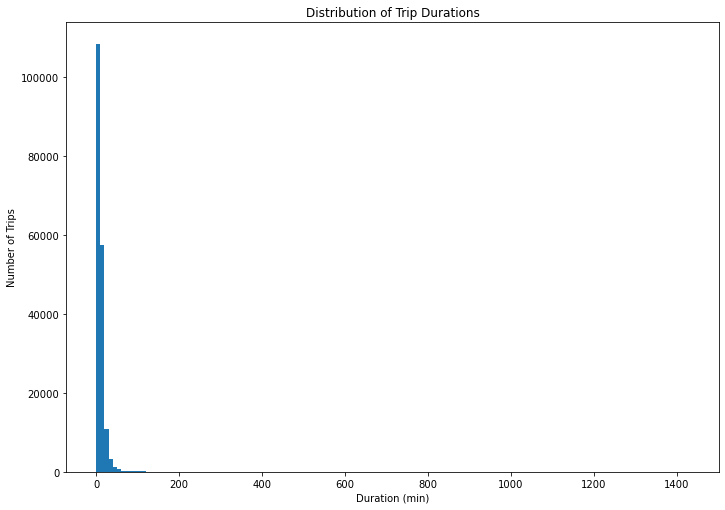

In [15]:
#Lets plot histogram plot displaying bike trips in minutes
binsize = 10
bins = np.arange(0, df['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[11.69, 8.27])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.show()

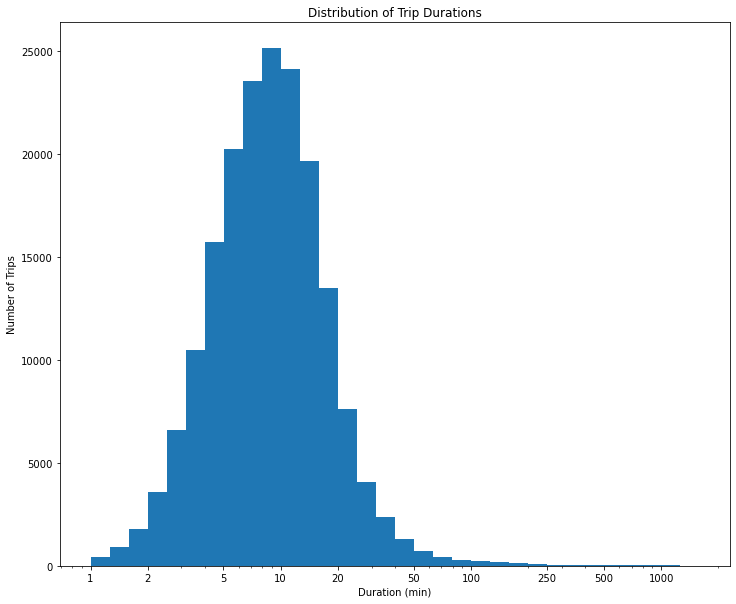

In [16]:
# Let reduce the long tail by applying logarthmic scale transformation on a histogram
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[12.00, 10.00])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 250, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

When we plotted the histogram normally,it had a long tailed distribution. When plotted on a log-scale, the duration distribution looks roughly bimodal, with one peak between 8 and 10. From our histogram, we can see most of the bike trips lasts between 8 and 15 minutes. There are not a lot of bike trips that lasted less than 3 minutes and over 40 minutes.

In [17]:
#lets find the duratin distribution
df.duration_minutes.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minutes, dtype: float64

- The average duratin time was 8.57 min.

**Lets check on the members ages and how to is related to the number of the trips they took**

2. Does age affect the number of the trips the member took?

In [18]:
#lets find the member age distribution
df.member_age.describe()


count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

- The average age is 34 years old

In [19]:
outliers = ((df.duration_minutes>100) | (df.member_age>70))
print(outliers.sum())

1482


**Lets take a look at the users distributions**<br>

4. which user has the highest distibution?

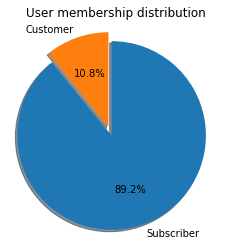

In [20]:
# plot a pie chart
user_category = df['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.title('User membership distribution')
plt.axis('square')
plt.show()

- From our bar gragh above,most the user who participated on the ride were subscribers.

**Lets look at the gender distribution**

5. Which genger participated most on the ride?

In [21]:
 df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

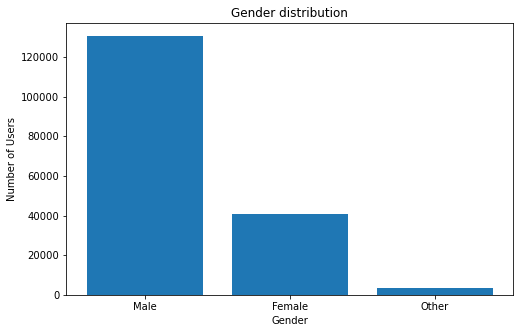

In [22]:
# lets plot genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title("Gender distribution")
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

- Most of the people who participated on the ride were male.

6. Which day of the week do people ride the most?

In [40]:
# labels to use in plots
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
month_labels =['January','February','March', 'April', 'May', 'June', 'July', 'August', 
                 'September', 'October', 'November', 'December']

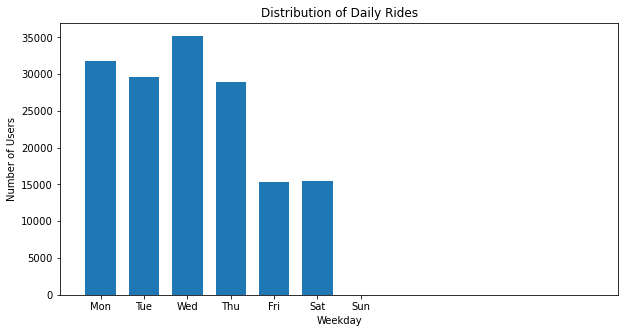

In [24]:
# plot a histogram with gaps between bars
bin_edges = np.arange(0.5, 12.5 + 1, 1)
plt.figure(figsize=[10,5])
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 7 + 1, 1),weekday_labels)
plt.xlabel('start_weekday')
plt.title('Distribution of Daily Rides')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.show()

- Out of the 7 days of the week people prefer to go ridding on the Wednesday,on sunday there was no to few ride activities recorded.

**Take away**
- The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to dip and does not regain any more peak value.<br>
- Birth year is converted by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better perception regarding trip duration dependency.
- By ploting the gender distribution we could clearly tell the ride event was dominated by males.
- Also start station and end station is plotted in a larger plot because it gives a better insight regarding traffic of bikes at certain stations.

## Bivariate Explotation

- Lets first have a look at the correlation between trip duration and age

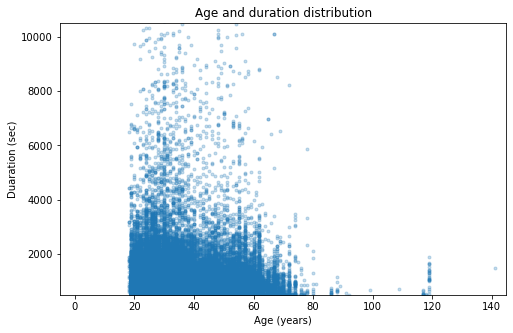

In [25]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.title('Age and duration distribution')
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()


- We can see that most of the durations are below 6000 and age is below 80,we can make some few adjustments.

**lets take a look at the trip distribution age.**

6. How does the strip distribution afffect age?

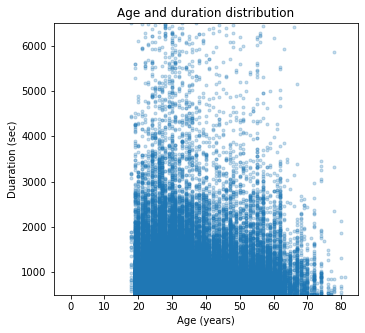

In [26]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Age and duration distribution')
plt.show()


- The highest riding duration from our plot was reached by the younger people that fall around the average age,the average age being,34 years old.

**lets look at the relationship between the gender the duration of the ride.**

7. Does the agender affect the duration of the rider?

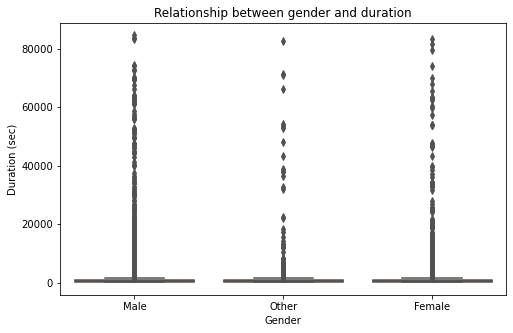

In [27]:
#let see the rationship between gender and the ride duration.
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.title('Relationship between gender and duration')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()

- We can not see our distribution clearly because of the widespread of the distribution.let do alittle bit of triming.

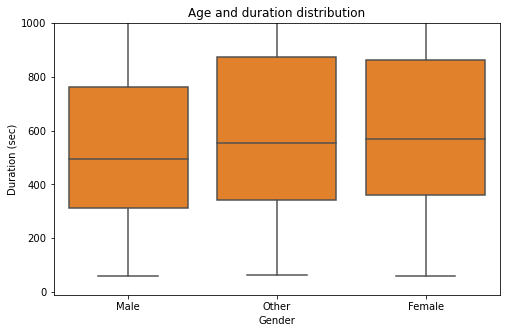

In [28]:
#let plot gender relation with duration max 1000
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1000])
plt.title('Age and duration distribution')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()


- As much as male riders were many than female as seen by our earlier plots,in this we can see that higher percentage of female and others rides longer trips then males

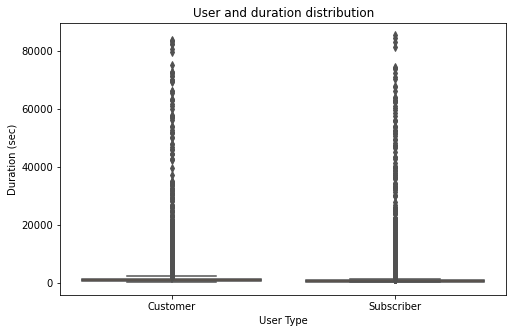

In [29]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('User and duration distribution')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

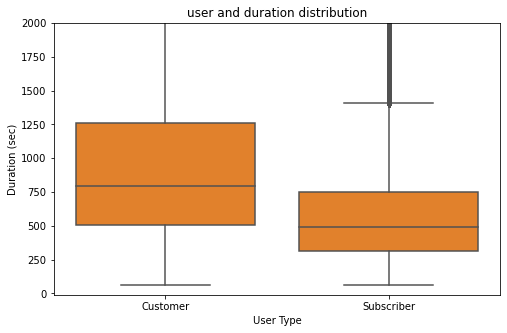

In [30]:
#let trim our plot a  little bit for a clear presentation.
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('user and duration distribution')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

- From the first plot you can see the data is wide spread we could not tell  clearly what we are look at,but when we trim our data,we can see,the longer trips were taken by the customer than the subcribers.

**Take away**
- Trip Duration is very dependendable on the age of the member, I havent expected the=at much dependency. On the other hand Start station and end station does not much determine the trip duration. It only suggests that some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point.
- From our ealier visualization we noticed that male were many that female and it culd have been natural to assume they are the one who too the longest trip but that is not the case when we did the comparion of the two variable gender and duration,we realize the famale are the one taking the longer that male regardless of their number.

## Multivariate Exploration

**Lets  the close relation between gender,age and ride duration.**

8. Does gender and age affect the ride duration?

<Figure size 1080x720 with 0 Axes>

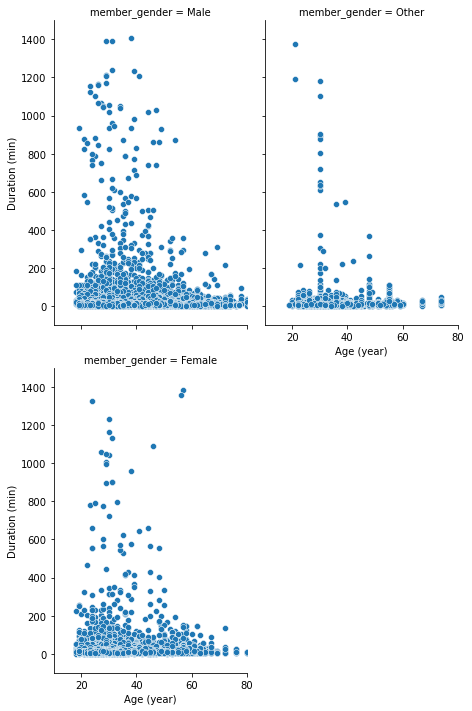

In [31]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
plt.figure(figsize=[15,10])
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sb.scatterplot, 'member_age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age (year)', 'Duration (min)')
g.add_legend()
plt.show()


- Female and male have close average ride rate and the member between the age opf 20 and 40 years old are the onces who loves riding.

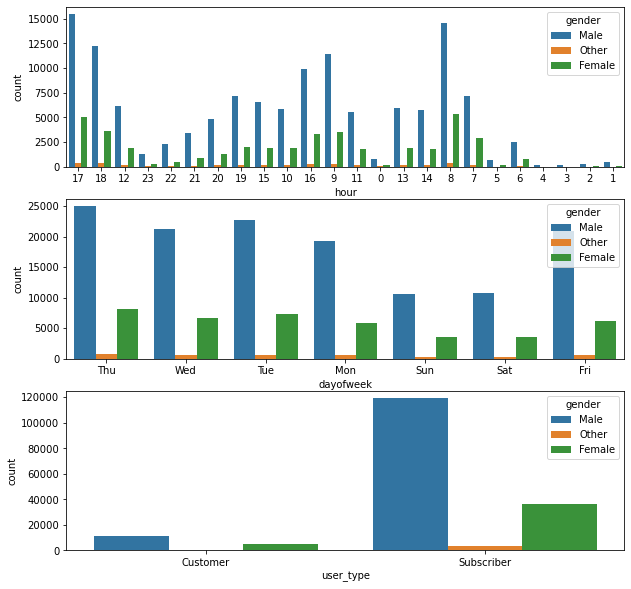

In [32]:
# lets see the above distribution on bar chart 
fig, ax = plt.subplots(nrows=3, figsize=[10,10])
sb.countplot(data=df, x='hour', hue='member_gender', palette='tab10', ax=ax[0])
ax[0].legend(title='gender')
sb.countplot(data=df, x='dayofweek', hue='member_gender', palette='tab10', ax=ax[1])
ax[1].legend(title='gender')
sb.countplot(data=df, x='user_type', hue='member_gender', palette='tab10', ax=ax[2])
ax[2].legend(title='gender')
plt.show()

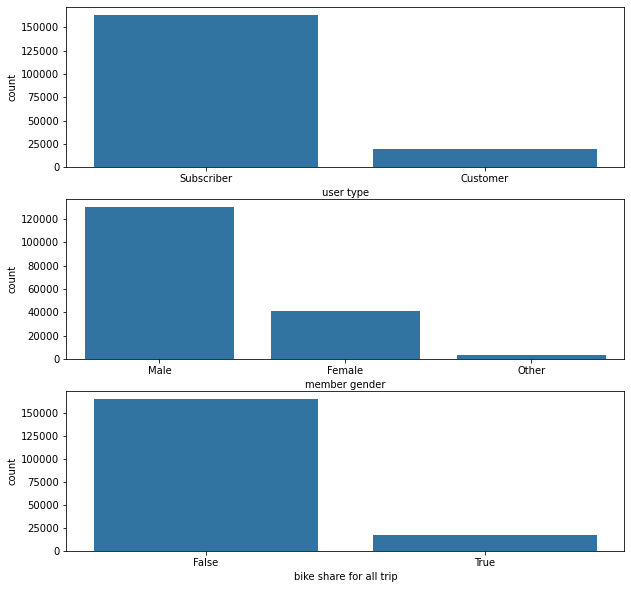

In [33]:
# let's plot user type, member gender and bike share for all trip together to get an idea of each categorical nominal 
# variable's distribution.
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color=default_color, order=df.user_type.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color=default_color,order=df.member_gender.value_counts().index,  ax = ax[1])
sb.countplot(data = df, x = 'bike_share_for_all_trip', color=default_color, \
              order=df.bike_share_for_all_trip.value_counts().index, ax = ax[2])
ax[0].set_xlabel('user type')
ax[1].set_xlabel('member gender')
ax[2].set_xlabel('bike share for all trip')
plt.show()


1. from the first plot we can see that most of the users are subcribers than the customers.
2. It seems that male love to ride than female and other gender has depicted on our second bar graph.
3. As much as the the sytem is for ride sharing,most of the people did not use the same ride for the whole trip.

In [71]:
#let plot a heatmap
def heatmap_function(cat_var1,cat_var2,num_var2):
    """this function will return a heatmap"""
    #specifing the figure size
    plt.figure(figsize=[15,5])
    cat_means = df.groupby([cat_var1, cat_var2]).mean()[num_var2]
    cat_means = cat_means.reset_index(name = num_var2)
    cat_means = cat_means.pivot(index = cat_var2, columns = cat_var1, values = num_var2)                                 
    sb.heatmap(cat_means, annot = True, fmt = '.3f',
               cbar_kws = {'label' : 'mean(num_var2)'})
    plt.title('Heatmap for {}, {} and {}'.format(cat_var1,cat_var2,num_var2));

            

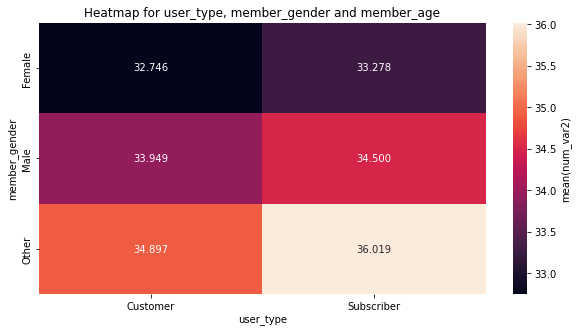

In [63]:
#ploting a heatmap for user type, gender and age
heatmap_function('user_type','member_gender','member_age')

In [67]:
df['member_age'].mean()

34.19356312126385

- The averge mean ot the customer female was 32.7 and the subcribjers 33.2
- The average mean of the male customers was 33.9 and subcribers 34.5
- The average mean of the customler other was 34.8 and the subcriber was 36.0

**The female customer who rode the bike were younger compared to the male and other customers.**

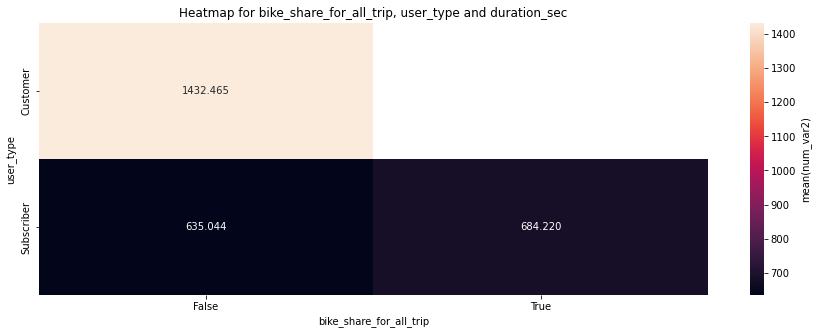

In [76]:
# plot a heatmap of 'duration in sec', 'user type', and 'bike_share_for_all_trip'
heatmap_function('bike_share_for_all_trip','user_type','duration_sec')

In [90]:
df['duration_sec'].mean()

726.078435434977

- The average duration in seconds  for the customer who did not share bike for the whole trip is 1432.47 
- The average duration in seconds  for the subcribers who did not share the bike whole trip is 635.0
- The average duration of the subcriber that shared the bike for the whole trip was 684.22.

**Most of the customer did share bike of the whole trip compare to the subcribers**

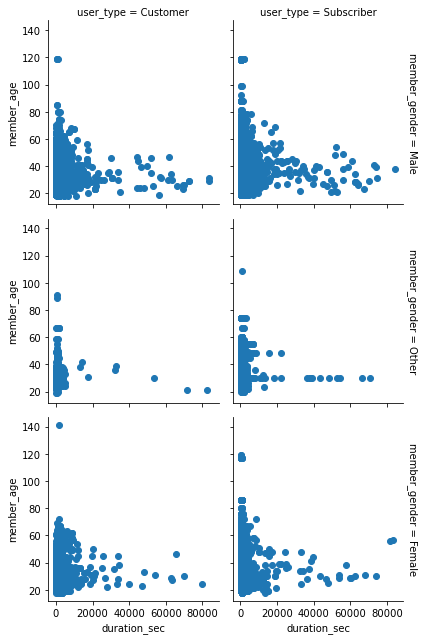

In [89]:
# Plot a scatter plot using facetgrid 'duration in sec', 'user type', and 'member gender'.
g = sb.FacetGrid(data =df, col = 'user_type', row = 'member_gender', 
                margin_titles = True)
g.map(plt.scatter,'duration_sec','member_age');

- The was no correlation between being a customer or subcriber and the duration take to ride the bike and age.
- How there was a negative correlation between the member age and the duration taken to ride the bike.Because those who were younger than 40 years of age took rode for a longer duration that those who were 80 years

In [68]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,...,bike_share_for_all_trip,start_month,start_weekday,start_hour,duration_minutes,hour,dayofweek,member_age,start_time_weekday,start_time_month_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,...,False,2,3,17,869.750000,17,Thu,35.0,NaN,NaN
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,...,False,2,3,18,708.683333,18,Thu,NaN,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,...,False,2,3,12,1030.900000,12,Thu,47.0,NaN,NaN
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,...,False,2,3,17,608.166667,17,Thu,30.0,NaN,NaN
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,...,True,2,3,23,26.416667,23,Thu,45.0,NaN,NaN


In [69]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_month', 'start_weekday', 'start_hour',
       'duration_minutes', 'hour', 'dayofweek', 'member_age',
       'start_time_weekday', 'start_time_month_name'],
      dtype='object')

##  Explanatory Analysis

Ford GoBike System Data is all about information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
We got to analyse and visualised how both the depependent and independent variables.

1. When we plotted the histogram normally,it had a long tailed distribution. When plotted on a log-scale, the duration       distribution looks roughly bimodal, with one peak between 8 and 10. From our histogram, we can see most of the bike trips lasts between 8 and 15 minutes. There are not a lot of bike trips that lasted less than 3 minutes and over 40 minutes.

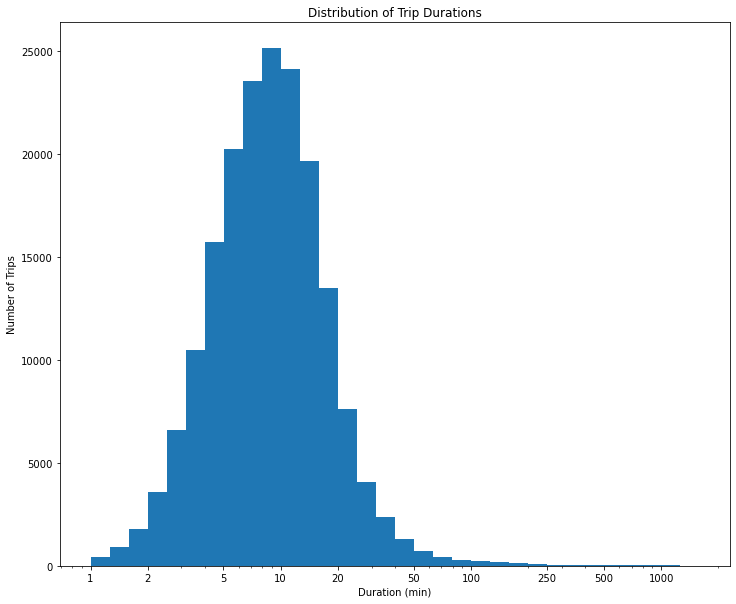

In [34]:
# Let reduce the long tail by applying logarthmic scale transformation on a histogram
log_binsize = 0.1
log_bins = 10 ** np.arange(0.0, np.log10(df['duration_minutes'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[12.00, 10.00])
plt.hist(data = df, x = 'duration_minutes', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 250, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

2. The members between the age of 20years old and 40 years old are the one who went through the most trip,at the tip,it was presentated by the members between the age of 35 to 40 year old.With the average being 34,we can say the people who went for the longest trip were between the average age.

3. - From our bar gragh above,most the user who participated on the ride were subscribers.

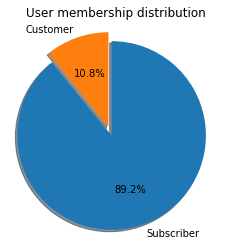

In [35]:
# plot a pie chart
user_category = df['user_type'].value_counts()
plt.pie(user_category, explode =  (0, 0.1), labels = user_category.index, shadow = True, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.title('User membership distribution')
plt.axis('square')
plt.show()

**Take away**
- The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to dip and does not regain any more peak value.<br>
- Birth year is converted by substracting the year from current year so this gives us a distibution for age, this action is performed as age gives a better perception regarding trip duration dependency.
- By ploting the gender distribution we could clearly tell the ride event was dominated by males.
- Also start station and end station is plotted in a larger plot because it gives a better insight regarding traffic of bikes at certain stations.

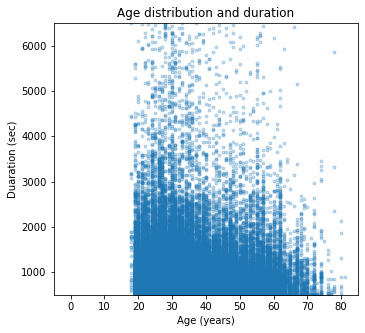

In [36]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.title('Age distribution and duration')
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

6. As much as male riders were many than female as seen by our earlier plots,in this we can see that higher percentage of female and others rides longer trips then males

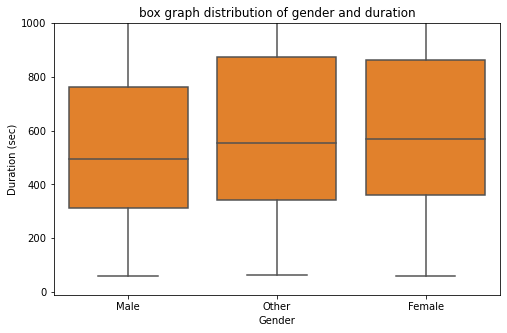

In [37]:
#let plot gender relation with duration max 1000
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 1000])
plt.title('box graph distribution of gender and duration')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.show()


**Take away**
- Trip Duration is very dependendable on the age of the member, I havent expected the=at much dependency. On the other hand Start station and end station does not much determine the trip duration. It only suggests that some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point.
- From our ealier visualization we noticed that male were many that female and it culd have been natural to assume they are the one who too the longest trip but that is not the case when we did the comparion of the two variable gender and duration,we realize the famale are the one taking the longer that male regardless of their number.

 7. Female and male have close average ride rate and the member between the age opf 20 and 40 years old are the onces who loves riding.

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

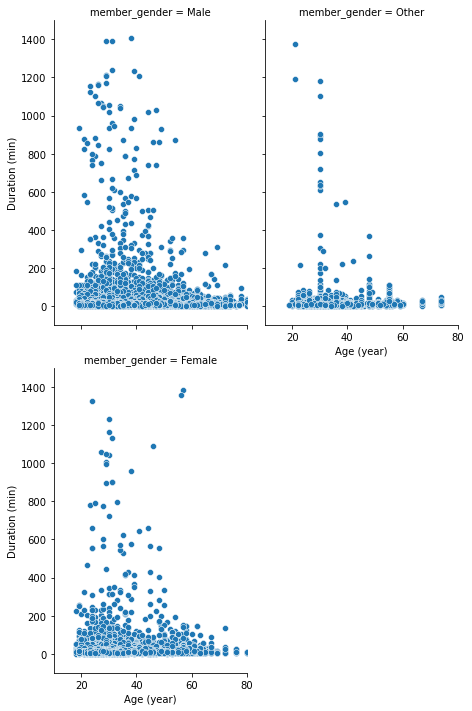

In [38]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
plt.figure(figsize=[15,10]);
plt.figure()
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, height = 5, aspect =0.65, xlim = [10, 80], ylim = [-100, 1500])
g.map_dataframe(sb.scatterplot, 'member_age', 'duration_minutes', alpha= None)
g.set_axis_labels('Age (year)', 'Duration (min)')
g.add_legend()
plt.show()


8. 
- from the first plot we can see that most of the users are subcribers than the customers.
- It seems that male love to ride than female and other gender has depicted on our second bar graph.
- As much as the the sytem is for ride sharing,most of the people did not use the same ride for the whole trip.

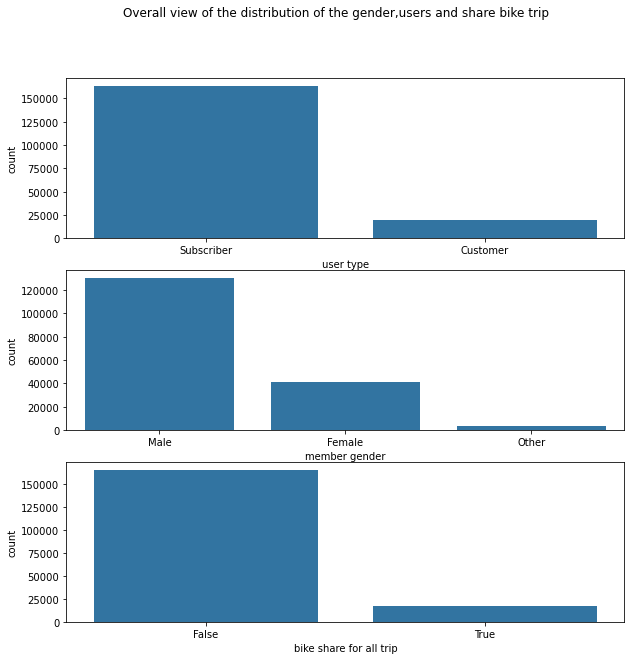

In [39]:
# let's plot user type, member gender and bike share for all trip together to get an idea of each categorical nominal 
# variable's distribution.
fig, ax = plt.subplots(nrows=3, figsize = [10,10])
default_color = sb.color_palette()[0]
fig.suptitle('Overall view of the distribution of the gender,users and share bike trip')
sb.countplot(data = df, x = 'user_type', color=default_color, order=df.user_type.value_counts().index, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color=default_color,order=df.member_gender.value_counts().index,  ax = ax[1])
sb.countplot(data = df, x = 'bike_share_for_all_trip', color=default_color, \
              order=df.bike_share_for_all_trip.value_counts().index, ax = ax[2])
ax[0].set_xlabel('user type')
ax[1].set_xlabel('member gender')
ax[2].set_xlabel('bike share for all trip')
plt.show()

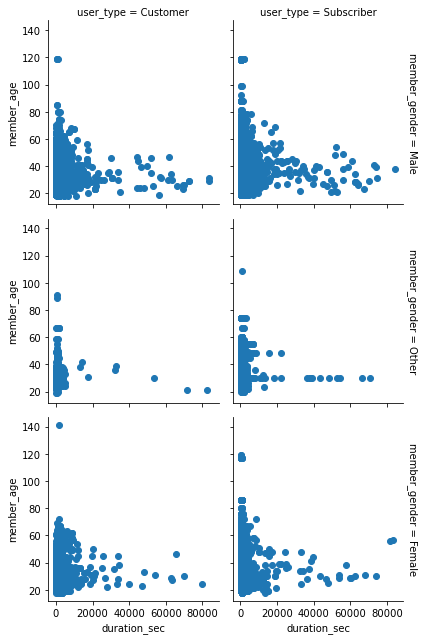

In [91]:
# Plot a scatter plot using facetgrid 'duration in sec', 'user type', and 'member gender'.
g = sb.FacetGrid(data =df, col = 'user_type', row = 'member_gender', 
                margin_titles = True)
g.map(plt.scatter,'duration_sec','member_age');

- The was no correlation between being a customer or subcriber and the duration take to ride the bike and age.
- How there was a negative correlation between the member age and the duration taken to ride the bike.Because those who were younger than 40 years of age took rode for a longer duration that those who were 80 years

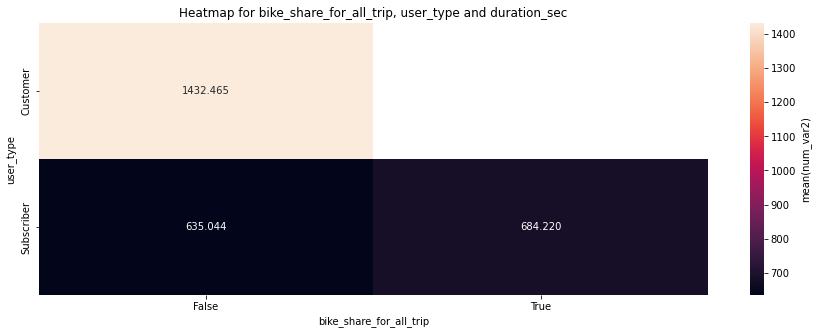

In [92]:
# plot a heatmap of 'duration in sec', 'user type', and 'bike_share_for_all_trip'
heatmap_function('bike_share_for_all_trip','user_type','duration_sec')

- The average duration in seconds  for the customer who did not share bike for the whole trip is 1432.47 
- The average duration in seconds  for the subcribers who did not share the bike whole trip is 635.0
- The average duration of the subcriber that shared the bike for the whole trip was 684.22.


## Conclusion
Ford gobike,bike sharing system that is being used in San Francisco Bay area,is love by males than the other gender.And most of the people who participate on the events are subcriber of the system.
The system is most enjoyed by the yound people between mthe age of 20 and 40.
it should be encourage more to the female,caus eas much as the few of them attends the events than the male,they tend to over the trip for a longer duratio mthat the male and the other gender.


## Reference
1. https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or
2. https://rise.readthedocs.io/en/stable/exportpdf.html
3. https://github.com/meet3012/Ford-GoBike-System-Data-Visualization/blob/master/Data-Exploration-with-Bike-Data.ipynb